<a href="https://colab.research.google.com/github/trick491/Data-Science-Final-Project/blob/main/milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring the Relationship Between Financial Statement Items and Stock Performance**

Patrick Johnson and Anh Pham

In [1]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/Colab_Notebooks/milestone1

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab_Notebooks/milestone1 to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 880412 bytes to /content/drive/MyDrive/Colab_Notebooks/milestone.html


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Github webpage: https://trick491.github.io/

##**Project Goals**

The goal of this project is to analyze and determine how different financial statement indexes correlate with stock price changes for companies in the S&P 500 over the past ten years. Instead of focusing on the most common measure, earnings per share (EPS), we want to see if factors like depreciation, assets, or liabilities also help explain stock performance. By finding these correlations, we hope to better understand how financial decisions and company internal set up are reflected in investor behavior and market value.
<br><br>

##**Project Dataset**

The datasets we are considering working with are the SEC EDGAR Financial Statement Metrics and Yahoo Finance Historical Stock Data. Together, these two datasets will allow us to examine how companies’ internal financial structures influence their external market performance over time. Our goal is to identify relationships between balance sheet and income statement items, especially those unrelated to earnings per share (EPS) (such as depreciation and total liabilities), and stock price trends for firms in the S&P 500 index.
<br><br>
The SEC EDGAR dataset provides standardized financial statement information of publicly traded U.S. companies, including variables like total assets, total liabilities, depreciation, and operating income. The Yahoo Finance dataset contains corresponding market data such as daily closing prices and trading volumes. By organizing the stock data by year and linking it to the financial data from EDGAR using company tickers or IDs, we can create one dataset that shows both a company’s financial performance and its market value
<br><br>
This integration will allow us to answer questions such as: How do changes in liabilities or depreciation expenses relate to changes in stock prices? Do firms with more asset growth correlate to higher long-term stock performance? Combining these two datasets bridges the gap between corporate accounting and investor behavior, providing a comprehensive foundation for analyzing how internal financial indicators translate into market outcomes.
<br><br>

##**Collaboration Plan**
Our collaboration plan is to divide tasks and work individually on google colab, while actively communicating via message. We will meet up in person once a week to update our progress, finalize our project vision, discuss the quality of our work, and resolve any issues. We have also set up a shared GitHub repository to coordinate our work and upload code. All code contributions are documented with clear comments and commit messages. One member will focus on data extraction and cleaning (ETL from EDGAR and Yahoo Finance). The other will handle data analysis and visualization, ensuring results are clearly communicated on our GitHub Pages website. We will focus on our task but also actively assist the other person when needed.  



**Pull Together Data**


The first dataset is already downloaded using yahoo finance API, historical stock price data from all of the companies in the S&P

For the second, we will have to use CIK (Central Index Key) to call EDGAR API because storing metrics takes up too much storage. In this case, Google's is 0001652044, to find fact_name, label, description, values, etc. of all financial metrics in filings since IPO.

In [3]:
import pandas as pd
import requests

# EDGAR API for Google.
cik = "0001652044"
edgar_api = f'https://data.sec.gov/api/xbrl/companyfacts/CIK{cik}.json'

# SEC requires proper User-Agent header
headers = {
    'User-Agent': 'Your Company Name your.email@domain.com',
    'Accept-Encoding': 'gzip, deflate'
}

# Fetch EDGAR data
edgar_response = requests.get(edgar_api, headers=headers)
edgar_df = pd.DataFrame()

if edgar_response.status_code == 200:
    data = edgar_response.json()

    # Extract all US-GAAP data
    us_gaap_data = []

    if 'us-gaap' in data.get('facts', {}):
        for fact_name, fact_details in data['facts']['us-gaap'].items():
            if 'units' in fact_details:
                for unit_type, records in fact_details['units'].items():
                    for record in records:
                        us_gaap_data.append({
                            'fact_name': fact_name,
                            'label': fact_details.get('label', ''),
                            'description': fact_details.get('description', ''),
                            'unit': unit_type,
                            'value': record.get('val'),
                            'start_date': record.get('start'),
                            'end_date': record.get('end'),
                            'filed_date': record.get('filed'),
                            'form': record.get('form'),
                            'frame': record.get('frame', ''),
                            'fiscal_year': record.get('fy'),
                            'fiscal_period': record.get('fp'),
                            'accn': record.get('accn'),
                            'company_cik': data.get('cik'),
                            'company_name': data.get('entityName')
                        })

    edgar_df = pd.DataFrame(us_gaap_data)

# Yahoo API (your existing code)
yahoo_api = 'https://api.github.com/repos/trick491/Data-Science-Final-Project/contents/data/yahoo'
yahoo_response = requests.get(yahoo_api)
yahoo_df = pd.DataFrame()

if yahoo_response.status_code == 200:
    yahoo_files = yahoo_response.json()
    for file in yahoo_files:
        if file['name'].endswith('.csv'):
            file_url = file['download_url']
            df_temp = pd.read_csv(file_url)
            yahoo_df = pd.concat([yahoo_df, df_temp], ignore_index=True)
            print(f"Loaded Yahoo file: {file['name']}")

print(f"EDGAR DataFrame shape: {edgar_df.shape}")
print(f"Yahoo DataFrame shape: {yahoo_df.shape}")

# Display first few rows of EDGAR data with label and description
print("\nEDGAR US-GAAP Data Sample:")
edgar_df['Ticker'] = 'GOOG'



Loaded Yahoo file: yahoo_1.csv
Loaded Yahoo file: yahoo_10.csv
Loaded Yahoo file: yahoo_11.csv
Loaded Yahoo file: yahoo_12.csv
Loaded Yahoo file: yahoo_13.csv
Loaded Yahoo file: yahoo_14.csv
Loaded Yahoo file: yahoo_15.csv
Loaded Yahoo file: yahoo_16.csv
Loaded Yahoo file: yahoo_17.csv
Loaded Yahoo file: yahoo_18.csv
Loaded Yahoo file: yahoo_19.csv
Loaded Yahoo file: yahoo_2.csv
Loaded Yahoo file: yahoo_20.csv
Loaded Yahoo file: yahoo_21.csv
Loaded Yahoo file: yahoo_22.csv
Loaded Yahoo file: yahoo_23.csv
Loaded Yahoo file: yahoo_24.csv
Loaded Yahoo file: yahoo_25.csv
Loaded Yahoo file: yahoo_26.csv
Loaded Yahoo file: yahoo_27.csv
Loaded Yahoo file: yahoo_28.csv
Loaded Yahoo file: yahoo_29.csv
Loaded Yahoo file: yahoo_3.csv
Loaded Yahoo file: yahoo_30.csv
Loaded Yahoo file: yahoo_31.csv
Loaded Yahoo file: yahoo_32.csv
Loaded Yahoo file: yahoo_33.csv
Loaded Yahoo file: yahoo_34.csv
Loaded Yahoo file: yahoo_35.csv
Loaded Yahoo file: yahoo_36.csv
Loaded Yahoo file: yahoo_37.csv
Loaded Yaho

**Example of Edgar Observation (Google)**

In [4]:
print(edgar_df.iloc[:1])

                fact_name                      label  \
0  AccountsPayableCurrent  Accounts Payable, Current   

                                         description unit         value  \
0  Carrying value as of the balance sheet date of...  USD  1.715000e+09   

  start_date    end_date  filed_date  form frame  fiscal_year fiscal_period  \
0       None  2014-12-31  2015-10-29  10-Q               2015            Q3   

                   accn  company_cik   company_name Ticker  
0  0001652044-15-000005      1652044  Alphabet Inc.   GOOG  


**Example of Yahoo Observatioin (Google)**

In [5]:
print(yahoo_df.iloc[:1])

  Ticker                       Date      Open      High       Low     Close  \
0  GOOGL  2004-08-19 00:00:00-04:00  2.485361  2.586266  2.384952  2.493811   

      Volume  Dividends  Stock_Splits  
0  893181924        0.0           0.0  


Now we will create two rows with price before and after quarterlies with percent and $ change of prices

In [6]:
from multiprocessing import Pool, cpu_count
import numpy as np
from tqdm import tqdm

# FILTER BY TICKER: Set to None for all stocks, or specify ticker like 'GOOG'
FILTER_TICKER = 'GOOG'

print(edgar_df.head())
print(yahoo_df.head())

# Filter data if ticker is specified BEFORE copying
if FILTER_TICKER is not None:
    print(f"\n*** FILTERING DATA FOR TICKER: {FILTER_TICKER} ***\n")
    full_data = edgar_df[edgar_df['Ticker'] == FILTER_TICKER].copy()
    yahoo_df_filtered = yahoo_df[yahoo_df['Ticker'] == FILTER_TICKER].copy()
    print(f"Filtered to {len(full_data)} edgar rows and {len(yahoo_df_filtered)} yahoo rows for {FILTER_TICKER}")
else:
    print(f"\n*** PROCESSING ALL TICKERS ***\n")
    full_data = edgar_df.copy()
    yahoo_df_filtered = yahoo_df.copy()
    print(f"Total edgar rows: {len(full_data)}, Total yahoo rows: {len(yahoo_df_filtered)}")

# Create a dictionary for faster lookups (only for filtered tickers)
print("Creating lookup dictionary...")
yahoo_dict = {}
for ticker in tqdm(yahoo_df_filtered['Ticker'].unique(), desc="Processing tickers"):
    ticker_data = yahoo_df_filtered[yahoo_df_filtered['Ticker'] == ticker].sort_values('Date')
    yahoo_dict[ticker] = ticker_data

def get_price_before(args):
    idx, ticker, end_date = args

    if ticker not in yahoo_dict:
        return None

    ticker_data = yahoo_dict[ticker]
    matching = ticker_data[ticker_data['Date'] <= end_date]
    return matching.iloc[-1]['Close'] if len(matching) > 0 else None

def get_price_after(args):
    idx, ticker, end_date = args

    if ticker not in yahoo_dict:
        return None

    ticker_data = yahoo_dict[ticker]
    matching = ticker_data[ticker_data['Date'] > end_date]
    return matching.iloc[0]['Close'] if len(matching) > 0 else None

# Prepare arguments for parallel processing
print("Preparing data...")
args_list = [(idx, row.Ticker, row.end_date) for idx, row in enumerate(full_data.itertuples())]

# Calculate Price before in parallel
num_cores = cpu_count()
print(f"\nUsing {num_cores} cores")
print("Calculating 'Price before' in parallel...")

with Pool(num_cores) as pool:
    results = list(tqdm(
        pool.imap(get_price_before, args_list, chunksize=1000),
        total=len(args_list),
        desc="Price before"
    ))
    full_data['Price before'] = results

print("✓ 'Price before' complete!\n")

# Calculate Price after in parallel
print("Calculating 'Price after' in parallel...")

with Pool(num_cores) as pool:
    results = list(tqdm(
        pool.imap(get_price_after, args_list, chunksize=1000),
        total=len(args_list),
        desc="Price after"
    ))
    full_data['Price after'] = results

full_data['value'] = full_data['value'].astype(float)
full_data['Price after % change'] = ((full_data['Price after'] / full_data['Price before']) - 1) * 100
full_data['Price after $ change'] = full_data['Price after'] - full_data['Price before']
print(full_data.head())

                fact_name                      label  \
0  AccountsPayableCurrent  Accounts Payable, Current   
1  AccountsPayableCurrent  Accounts Payable, Current   
2  AccountsPayableCurrent  Accounts Payable, Current   
3  AccountsPayableCurrent  Accounts Payable, Current   
4  AccountsPayableCurrent  Accounts Payable, Current   

                                         description unit         value  \
0  Carrying value as of the balance sheet date of...  USD  1.715000e+09   
1  Carrying value as of the balance sheet date of...  USD  1.715000e+09   
2  Carrying value as of the balance sheet date of...  USD  1.715000e+09   
3  Carrying value as of the balance sheet date of...  USD  1.549000e+09   
4  Carrying value as of the balance sheet date of...  USD  1.931000e+09   

  start_date    end_date  filed_date  form      frame  fiscal_year  \
0       None  2014-12-31  2015-10-29  10-Q                    2015   
1       None  2014-12-31  2016-02-11  10-K                    2015   
2 

Processing tickers: 100%|██████████| 1/1 [00:00<00:00, 176.80it/s]

Preparing data...

Using 2 cores
Calculating 'Price before' in parallel...



Price before: 100%|██████████| 18637/18637 [00:19<00:00, 965.04it/s] 

✓ 'Price before' complete!

Calculating 'Price after' in parallel...



Price after: 100%|██████████| 18637/18637 [00:16<00:00, 1120.16it/s]

                fact_name                      label  \
0  AccountsPayableCurrent  Accounts Payable, Current   
1  AccountsPayableCurrent  Accounts Payable, Current   
2  AccountsPayableCurrent  Accounts Payable, Current   
3  AccountsPayableCurrent  Accounts Payable, Current   
4  AccountsPayableCurrent  Accounts Payable, Current   

                                         description unit         value  \
0  Carrying value as of the balance sheet date of...  USD  1.715000e+09   
1  Carrying value as of the balance sheet date of...  USD  1.715000e+09   
2  Carrying value as of the balance sheet date of...  USD  1.715000e+09   
3  Carrying value as of the balance sheet date of...  USD  1.549000e+09   
4  Carrying value as of the balance sheet date of...  USD  1.931000e+09   

  start_date    end_date  filed_date  form      frame  fiscal_year  \
0       None  2014-12-31  2015-10-29  10-Q                    2015   
1       None  2014-12-31  2016-02-11  10-K                    2015   
2 

Below are the items we want to choose find correlations for, for now lets choose a balance sheet item, "Long-term Debt and Lease Obligation".

In [7]:
print(full_data['label'].unique())

['Accounts Payable, Current'
 'Accounts Receivable, after Allowance for Credit Loss, Current'
 'Accrued Income Taxes, Current' 'Accrued Income Taxes, Noncurrent'
 'Accrued Liabilities, Current'
 'Accumulated Depreciation, Depletion and Amortization, Property, Plant, and Equipment'
 'Accumulated Other Comprehensive Income (Loss), Net of Tax'
 'Share-based Payment Arrangement, Decrease for Tax Withholding Obligation'
 'APIC, Share-based Payment Arrangement, Increase for Cost Recognition'
 'Adjustments to Additional Paid in Capital, Income Tax Benefit from Share-based Compensation'
 'Share-based Payment Arrangement, Expense'
 'Accounts Receivable, Allowance for Credit Loss'
 'Accounts Receivable, Allowance for Credit Loss, Current' 'Assets'
 'Assets, Current' 'Assets, Noncurrent'
 'Debt Securities, Available-for-sale, Accumulated Gross Unrealized Gain, before Tax'
 'Debt Securities, Available-for-sale, Accumulated Gross Unrealized Loss, before Tax'
 'Debt Securities, Available-for-sale, A

Define balance sheet item (snapshot) treatment in EDGAR - end_date only

change of values is treated normally on end_date from last end date, but we have duplicate value values that may obscure our data (seen below in graph 0% change)

In [8]:
def balance_sheet_example(example):

  # Display the subset of data for

  #narrow down to get rid of company name
  example = example[['Ticker','fact_name', 'label', 'description', 'value', 'start_date',
    'end_date', 'filed_date', 'form', 'frame', 'Price before',
    'Price after', 'Price after $ change', 'Price after % change']]

  # Calculate 'value before' (previous period's value)
  #The data is sorted by date, shift(1) to get the previous value

  example = example.sort_values('end_date').reset_index(drop=True)
  example['value before'] = example.groupby('fact_name')['value'].shift(1)

  # Calculate 'value $ change' (current value - previous value)
  example['value $ change'] = example['value'] - example['value before']

  # Calculate 'value % before' (percentage change from previous value)
  # Formula: ((current value - previous value) / previous value) * 100
  example['value % before'] = (example['value $ change'] / example['value before'].replace(0, np.nan)) * 100
  return example







Lets apply this function to to 'Accrued Liabilities, Current' and print

In [9]:
example = full_data.copy()
example = example.loc[example['label'] == 'Accrued Liabilities, Current']
example = balance_sheet_example(example)


Now lets add percent change of values from previous and plot by defining a new function, plot_correlation

In [10]:
import matplotlib.pyplot as plt

def plot_correlation(a, example):

  # Define variables
  y1_label = a
  y2 = 'value % before'
  y3 = 'Price after % change'
  FILTER_TICKER = 'GOOG'

  df = example.copy()

  if 'end_date' not in df.columns:
      raise KeyError("DataFrame must have an 'end_date' column to derive actual reported quarters.")
  df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

  df['reported_quarter'] = df['end_date'].dt.to_period('Q')

  df['quarter_end'] = df['reported_quarter'].dt.to_timestamp(how='end')

  plot_data = df[(df['Ticker'] == FILTER_TICKER) & (df['label'] == y1_label)].copy()

  plot_data = plot_data.dropna(subset=[y2, y3, 'quarter_end'])

  plot_data['__q_ordinal'] = plot_data['reported_quarter'].apply(lambda p: p.ordinal)
  plot_data = plot_data.sort_values('__q_ordinal').reset_index(drop=True)

  correlation = plot_data[[y2, y3]].corr().iloc[0, 1]
  print(f"\nCorrelation between {y2} and {y3} for {FILTER_TICKER}: {correlation:.4f}")

  fig, ax = plt.subplots(figsize=(14, 8))

  ax.plot(plot_data['quarter_end'], plot_data[y2], marker='o', linewidth=2, markersize=6, label=f'{a} % Change')
  ax.plot(plot_data['quarter_end'], plot_data[y3], marker='^', linewidth=2, markersize=6, label='Price % Change')

  ax.axhline(y=0, color='red', linestyle='--', alpha=0.5, linewidth=1)

  ax.set_xlabel('Quarter End (reported)', fontsize=12)
  ax.set_ylabel('Normalized Percentage Change (%)', fontsize=12)
  ax.set_title(f'Normalized Quarter-over-Quarter Changes: {y1_label} vs. Stock Price\nTicker: {FILTER_TICKER}\nCorrelation: {correlation:.4f}', fontsize=14, fontweight='bold', pad=14)

  ax.grid(True, alpha=0.3)
  ax.legend(loc='best', fontsize=10)

  x_labels = [str(p) for p in plot_data['reported_quarter']]
  ax.set_xticks(plot_data['quarter_end'])
  ax.set_xticklabels(x_labels, rotation=45, ha='right')

  # Adjust layout and display
  fig.tight_layout()
  plt.show()


Now lets plot our % changes to find correlation

  Ticker                  fact_name                         label  \
0   GOOG  AccruedLiabilitiesCurrent  Accrued Liabilities, Current   
1   GOOG  AccruedLiabilitiesCurrent  Accrued Liabilities, Current   
2   GOOG  AccruedLiabilitiesCurrent  Accrued Liabilities, Current   
3   GOOG  AccruedLiabilitiesCurrent  Accrued Liabilities, Current   
4   GOOG  AccruedLiabilitiesCurrent  Accrued Liabilities, Current   

                                         description         value start_date  \
0  Carrying value as of the balance sheet date of...  4.434000e+09       None   
1  Carrying value as of the balance sheet date of...  4.408000e+09       None   
2  Carrying value as of the balance sheet date of...  4.408000e+09       None   
3  Carrying value as of the balance sheet date of...  4.598000e+09       None   
4  Carrying value as of the balance sheet date of...  4.768000e+09       None   

     end_date  filed_date  form      frame  Price before  Price after  \
0  2014-12-31  2015-10-29

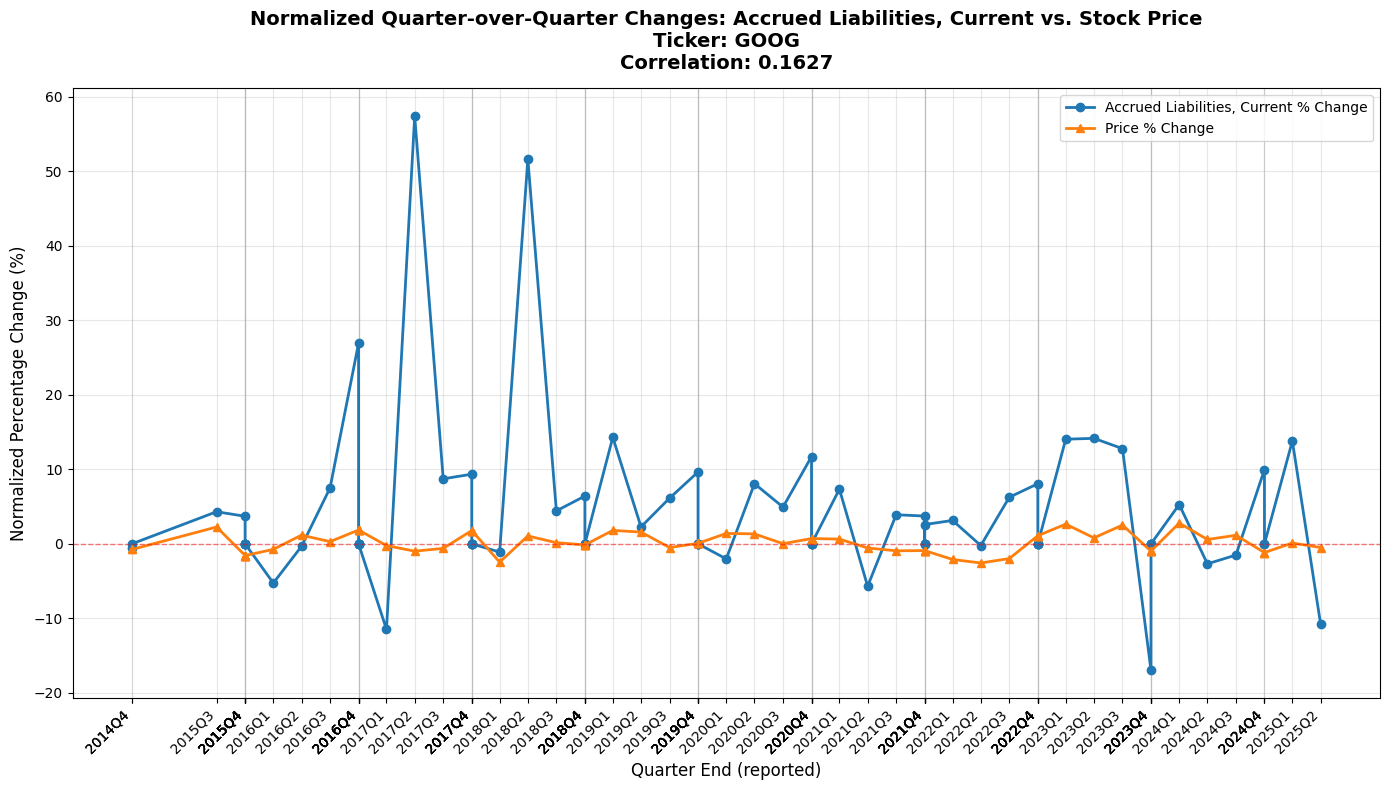

In [11]:
print(example.head())
plot_correlation('Accrued Liabilities, Current', example)

Sanity check, find Same thing for Accrued liabiltieis, non-current, correlations should roughly be the same


Correlation between value % before and Price after % change for GOOG: -0.0120


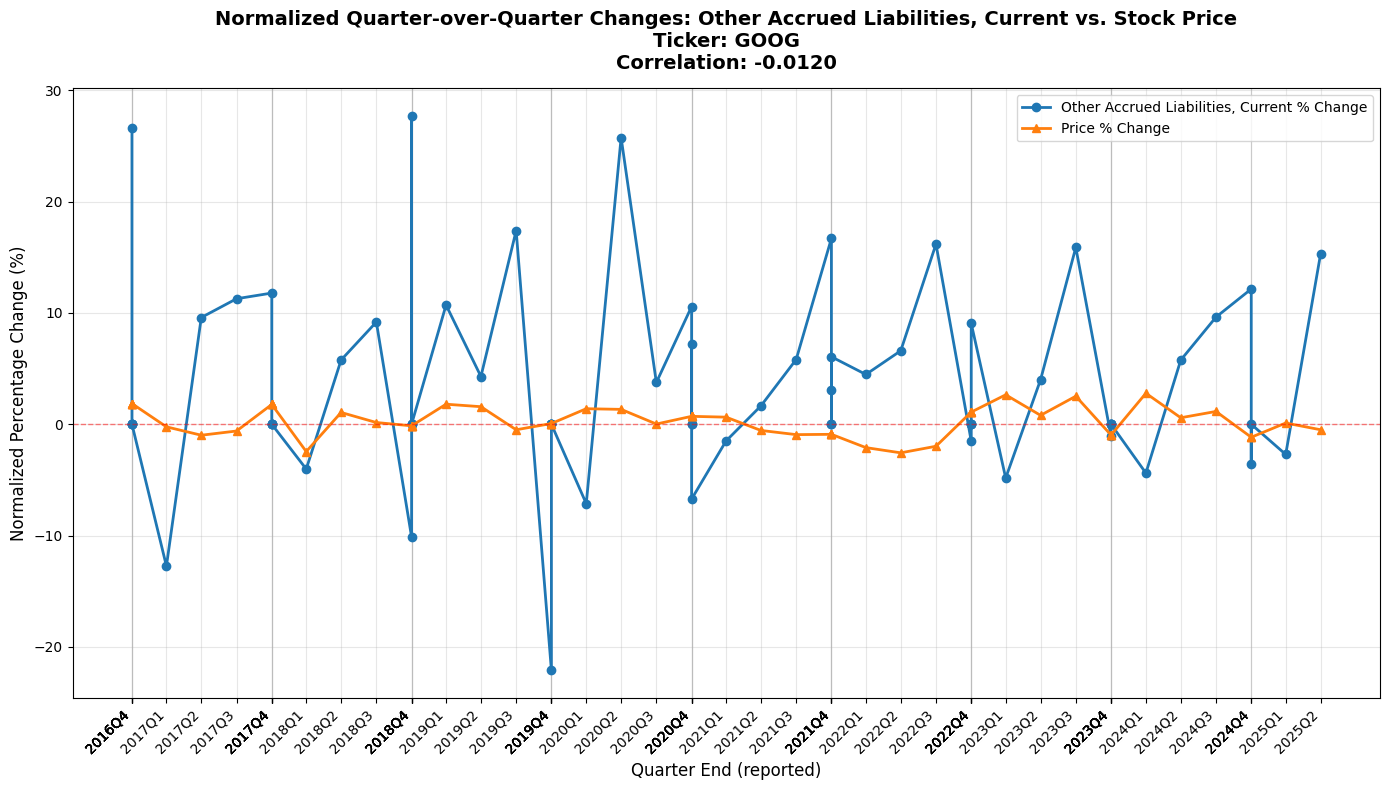

In [12]:
example2 = full_data.copy()

example2 = example2.loc[example2['label'] == 'Other Accrued Liabilities, Current']

example2 = balance_sheet_example(example2)

plot_correlation('Other Accrued Liabilities, Current', example2)

Lastly, lets chart an asset like cash


Correlation between value % before and Price after % change for GOOG: -0.2814


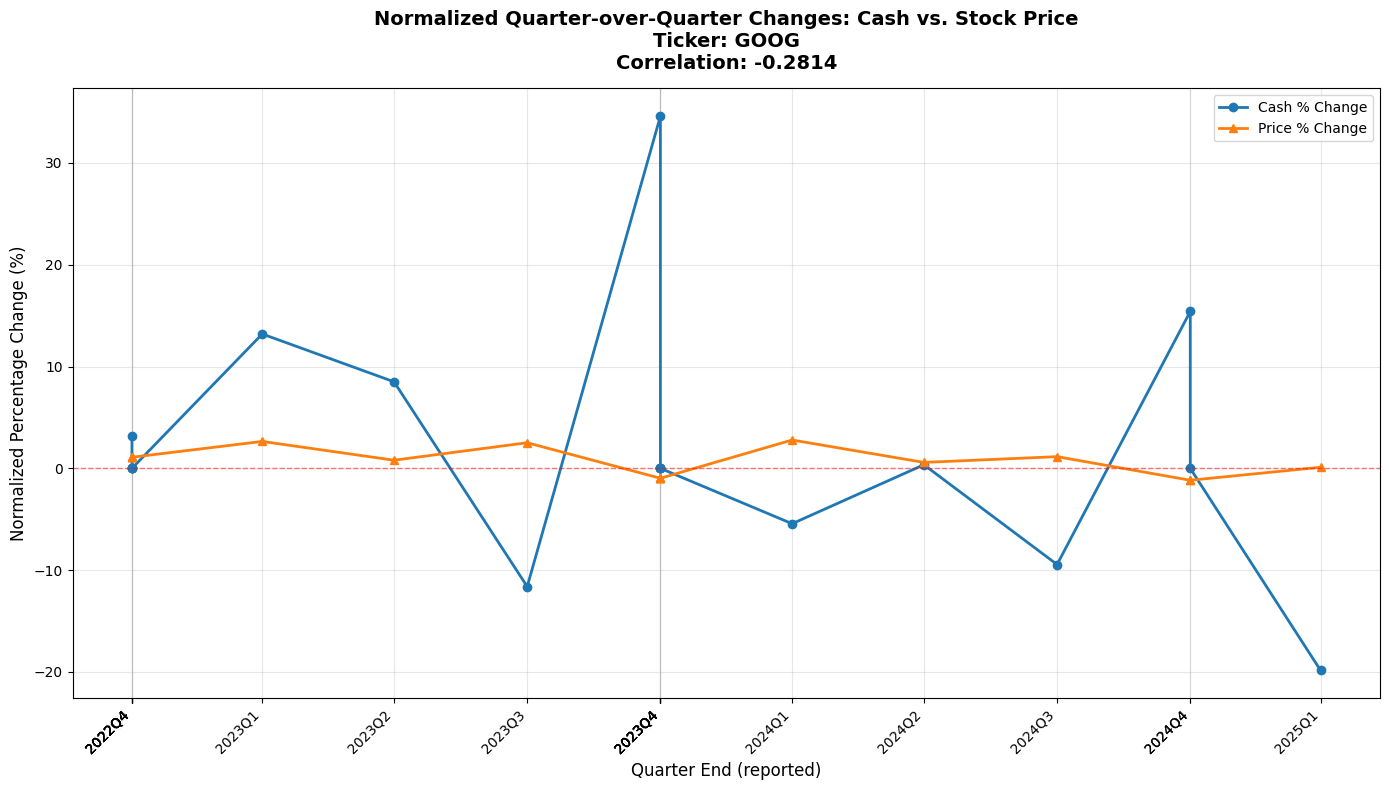

In [13]:
example3 = full_data.copy()

example3 = example3.loc[example3['label'] == 'Cash']

example3 = balance_sheet_example(example3)

plot_correlation('Cash', example3)

From these graphs we can see that there are multiple plots per date of value, which means there are duplicate values for % change as well, i.e values for 8k and 10k would have the same values, so the % change would be zero. To address this, in future EDA we should either take in one form, just 10k instead of both and for income statement items where there are at least 8 filings per 4 quarters (duplicate values for FY values [Q1 - Q2 total instead of just Q1 value]) we should look for start and end date to where they are roughly two months or use the feature 'frame' to narrow down this dataset and have a more accurate readout of % change correlations. OR we could take in absolute value change and normalize them, both of these approaches would require future analysis. The end result should be a rating system of which variables have highest correlation and a weighting assigned to each.

***